In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Functions

##### Distance function

In [2]:
def distance_metric(p):
    """
    Returns the function to compute distance between 
    sample and all members of X

    Uses the formula  [Σ (|X - Y|)^p] ^ (1/p)

    Different values of p produce different metrics
    p = 1, Manhattan distance
    p = 2, Euclidean distance 
    and so on
    """
    def calculate_distance(X, sample):
        difference = np.abs(X - sample) ** p
        distance = np.sum(difference, axis=1) ** (1/p)
        return distance

    return calculate_distance

##### KNN

In [3]:
def knn(data, labels, test_data, k=3, p=2):
    """
    Predicts label for test_data based on nearest K neighbours

    Parameters
    ----------
    data: array_like
        Data matrix, of size N Samples * M Features

    labels: array
        Labels for samples, of size N * 1

    test_data: array_like
        Data to be used for predictions

    k : int
        Number of nearby neighbours to decide label
    
    p: int
        Used to generate the distance metric function
    """

    calc_dist = distance_metric(p)
    predictions = []

    for observation in test_data:
        distances = calc_dist(data, observation)
        min_idxs = np.argpartition(distances, k)[:k]

        nearby_labels = labels[min_idxs]
        dominant_label = np.argmax(np.bincount(nearby_labels))

        predictions.append(dominant_label)

    return np.array(predictions)


#### Plotting decision surface function

In [4]:
def plot_knn_contour(data, labels, k=3, p=2, granularity=50):
    """
    Plots the desicion surface using contours

    Creates a grid of all the possible (x, y) points in the grid
    and predicts the label for those points using KNN.

    Then plots the controur of the (x, y) points against the predicted labels

    Parameters
    ----------
    data : array-like
        N * M samples
    
    labels: array
        Labels for samples.
    
    k : int
        Number of nearby neighbours to decide on.
        Default is 3

    p: int
        Power used for distance metric.
        Default is 2

    granularity : int
        Determines the spacing between the points on the grid.
        Default is 50
    """

    xx, yy = np.meshgrid(np.linspace(-5, 5, granularity), np.linspace(-5, 5, granularity))

    points = np.vstack((xx.ravel(), yy.ravel())).T

    zz = knn(data, labels, points, k, p)
    zz.shape = xx.shape

    plt.title(f'K = {k}, P = {p}')
    plt.contourf(xx, yy, zz, levels=len(np.unique(labels)) - 1)
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.show()


### Driver code

#### Applying & Evaluating on 2D data

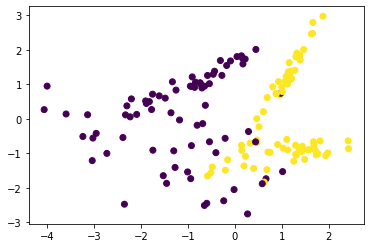

In [35]:
n = 150

X, y = make_classification(n, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X[:,0], X[:,1], c=y)

In [36]:
predictions = knn(X_train, y_train, X_test)

print(y_test)
print(predictions)
print('Accuracy score :' , accuracy_score(y_test, predictions))

[1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 1]
[1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 0]
Accuracy score : 0.9210526315789473


#### Testing different values for K

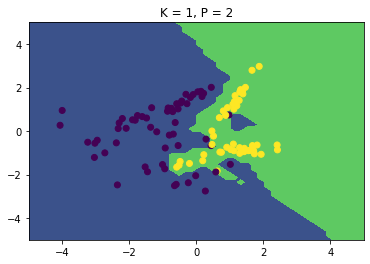

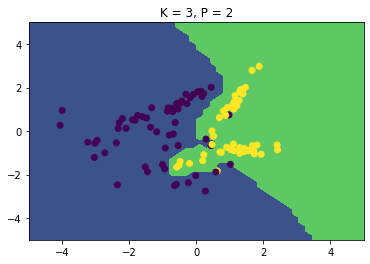

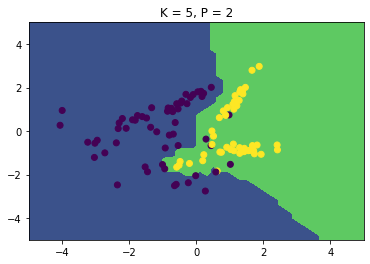

In [37]:
plot_knn_contour(X_train, y_train, k=1)
plot_knn_contour(X_train, y_train, k=3)
plot_knn_contour(X_train, y_train, k=5)

#### Testing different distance metrics

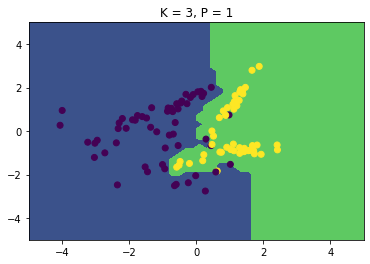

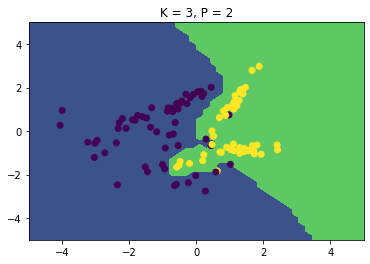

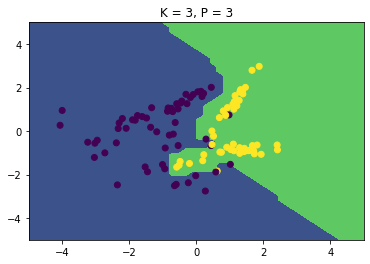

In [38]:
plot_knn_contour(X_train, y_train, p=1)
plot_knn_contour(X_train, y_train, p=2)
plot_knn_contour(X_train, y_train, p=3)

#### Testing on iris dataset

In [44]:
iris_features, iris_targets = load_iris(return_X_y=True)
iris_train, iris_test, target_train, target_test = train_test_split(iris_features, iris_targets)

iris_preds = knn(iris_train, target_train, iris_test)

print(iris_preds)
print(target_test)
print('Accuracy on iris : ', accuracy_score(target_test, iris_preds))

[1 1 0 0 2 2 0 1 0 0 2 2 0 2 1 0 0 2 0 1 2 0 1 0 2 1 1 0 1 2 1 1 0 0 0 0 2
 2]
[1 1 0 0 2 2 0 1 0 0 2 2 0 2 2 0 0 2 0 2 2 0 1 0 2 1 1 0 1 2 1 1 0 0 0 0 2
 2]
Accuracy on iris :  0.9473684210526315
